In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [7]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
X_train[10].shape

(28, 28)

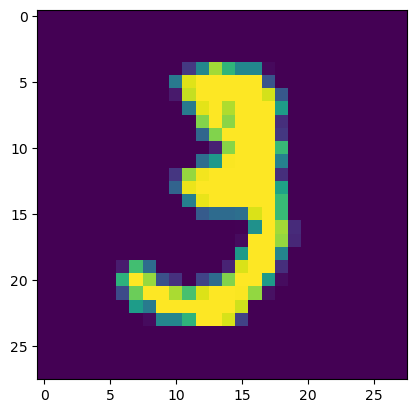

In [10]:
plt.imshow(X_train[10])
plt.show()

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [12]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [14]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [15]:
print(X_train[10])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

Building the Neural Network

In [16]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

C:\Users\sidal\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# training the Neural Network

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5160 - loss: 1.4891
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8597 - loss: 0.4814
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8905 - loss: 0.3747
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9018 - loss: 0.3331
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9090 - loss: 0.3075
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9145 - loss: 0.2877
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9197 - loss: 0.2705
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9237 - loss: 0.2546
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9287 - loss: 0.2399
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9329 - loss: 0.2262


Accuracy on Test Data

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9226 - loss: 0.2503
0.9307000041007996


In [22]:
print(X_test.shape)

(10000, 28, 28)


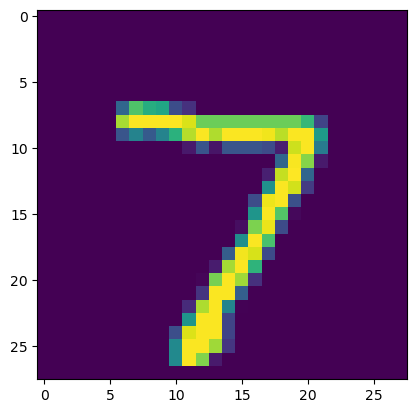

In [24]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [25]:
print(y_test[0])

7


In [26]:
ypred = model.predict(X_test)
ypred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.5191852e-01, 9.7741315e-05, 4.6939307e-01, ..., 9.9942946e-01,
        1.4386237e-02, 5.3968710e-01],
       [8.5922229e-01, 1.9892391e-03, 9.9970984e-01, ..., 3.4643993e-10,
        2.2301437e-01, 6.0568252e-11],
       [2.7446696e-04, 9.8749334e-01, 3.5332829e-01, ..., 8.1672892e-02,
        1.9874242e-01, 7.3253158e-03],
       ...,
       [2.8238088e-05, 2.0613451e-04, 5.5521843e-04, ..., 1.0999877e-02,
        4.2013758e-01, 9.4872957e-01],
       [3.4418814e-03, 9.3027130e-02, 2.2741557e-04, ..., 2.7263812e-05,
        8.9278579e-01, 1.3457496e-02],
       [7.5166368e-01, 1.9485318e-05, 8.4344858e-01, ..., 5.6071507e-08,
        7.2864547e-02, 3.6075182e-06]], dtype=float32)

In [27]:
ypred.shape

(10000, 10)

In [28]:
ypred[0]

array([2.5191852e-01, 9.7741315e-05, 4.6939307e-01, 7.4821454e-01,
       1.6956597e-05, 1.0554567e-02, 9.8136375e-08, 9.9942946e-01,
       1.4386237e-02, 5.3968710e-01], dtype=float32)

model.predict() gives the prediction probability of each class for that data point

In [31]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(ypred[0])
print(label_for_first_test_image)

7


In [33]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in ypred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 9, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 4, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusion Matrix

In [36]:
cm = confusion_matrix(y_test, Y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    1,    0,    6,   13,    3,    1,    0],
       [   0, 1108,    2,    3,    1,    1,    3,    2,   15,    0],
       [  10,    7,  936,   18,    9,    4,   10,    8,   27,    3],
       [   1,    1,   16,  953,    1,   12,    1,    8,   12,    5],
       [   2,    1,    4,    1,  939,    0,    8,    1,    3,   23],
       [   6,    3,    0,   44,   14,  778,   15,    0,   23,    9],
       [   7,    3,    3,    1,   11,   11,  918,    0,    4,    0],
       [   1,    9,   18,   10,    6,    1,    0,  941,    0,   42],
       [   5,    4,    2,   27,   14,   18,   16,   10,  869,    9],
       [  10,    9,    1,   10,   50,    8,    0,    8,    2,  911]])>

Text(0.5, 47.7222222222222, 'Predicted Labels')

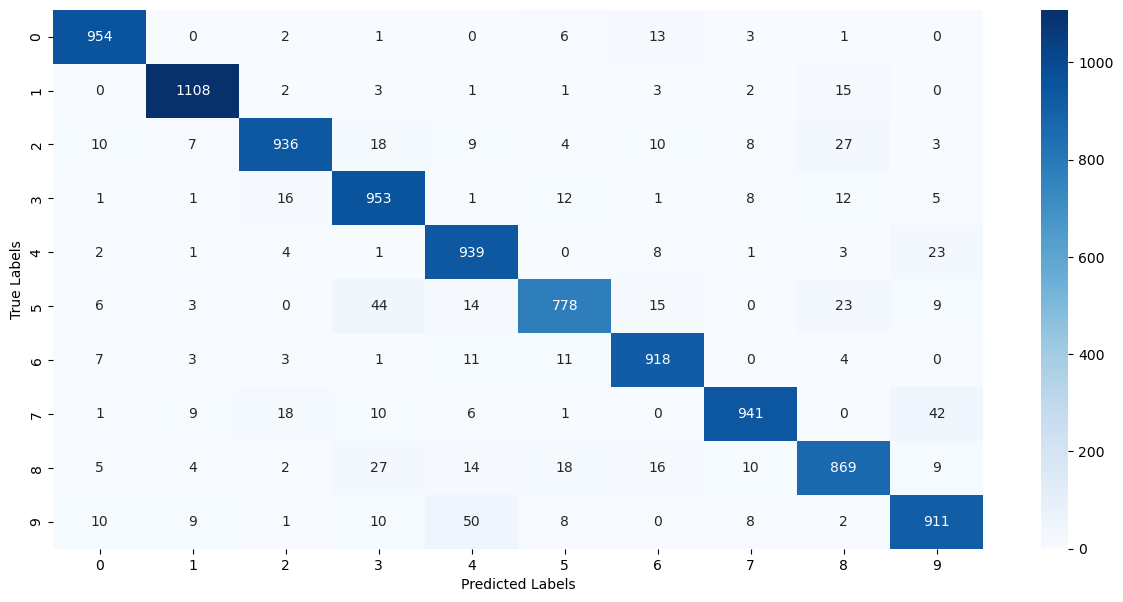

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')